In [133]:
import pandas as pd

data = pd.read_csv("/content/drive/MyDrive/Data_10years/Dataset_Final - Sheet1 (3) - Dataset_Final - Sheet1 (3).csv")

data = data.sample(frac = 1)

In [134]:
data.describe()

,Pd,Tauc,Magnitude
count,300.000000,300.000000,300.00000
mean,0.043770,4.158302,4.77700
std,0.105538,2.912840,0.87433
min,0.001523,0.160575,2.50000
25%,0.007805,1.450726,4.20000
50%,0.015769,3.566640,4.70000
75%,0.034281,6.774268,5.30000
max,0.828050,10.516920,7.80000


# **Finding correlation**
The Pearson correlation is also known as the “product moment correlation coefficient” (PMCC) or simply “correlation”. Pearson correlations are only suitable for quantitative variables (including dichotomous variables).

In [135]:
pearcorr = data.corr(method ='pearson')
print(pearcorr)

                 Pd      Tauc  Magnitude
Pd         1.000000  0.330489   0.373511
Tauc       0.330489  1.000000   0.264687
Magnitude  0.373511  0.264687   1.000000


# Creating two classes for alarm
The class 0 is for magnitude <= 5.5 ie. no alarm
The class 1 is for magnitude > 5.5 ie. alarm

In [136]:
mag = data['Magnitude']
clf = []
for i in mag:
  if i <= 5.5:
    clf.append(0)

  else:
    clf.append(1)

data["clf"] = clf
data.head()

,Center,Pd,Tauc,Magnitude,clf
238,20100501-Distt. Bageshwar Uttarakhand-Three Co...,0.203630,8.762039,4.6,0
138,Bageshwar_Three Component Data_Champawat - She...,0.002288,5.126570,4.3,0
99,Manipur meghalaya Border Region_Three Componen...,0.095145,3.178585,5.3,0
16,Delhi-Haryana-CRRI - Sheet1.csv,0.009409,1.037975,4.3,0
284,Alwar Earthquake-Alwar - Sheet1.csv 1,0.024071,1.103470,3.9,0


In [137]:
data.drop(["Center", "Magnitude"], axis = 1, inplace = True)
df = data.copy()
data.head(10)

,Pd,Tauc,clf
238,0.203630,8.762039,0
138,0.002288,5.126570,0
99,0.095145,3.178585,0
16,0.009409,1.037975,0
284,0.024071,1.103470,0
8,0.024071,1.103470,0
206,0.003404,2.913939,0
283,0.014944,1.321682,0
231,0.012136,7.863555,0
245,0.024087,6.770648,0


# **What is a Z-Score?**
Simply put, a z-score (also called a standard score) gives you an idea of how far from the mean a data point is. But more technically it’s a measure of how many standard deviations below or above the population mean a raw score is.

A z-score can be placed on a normal distribution curve. Z-scores range from -3 standard deviations (which would fall to the far left of the normal distribution curve) up to +3 standard deviations (which would fall to the far right of the normal distribution curve). In order to use a z-score, you need to know the mean μ and also the population standard deviation σ.

The basic z score formula for a sample is:
z = (x – μ) / σ



In [138]:
from scipy import stats
data["Pd"] = stats.zscore(data["Pd"])
data["Tauc"] = stats.zscore(data["Tauc"])
df2 = data.copy()
df3 = data.copy()
data.head(10)

,Pd,Tauc,clf
238,1.517245,1.583139,0
138,-0.393712,0.332969,0
99,0.487602,-0.336906,0
16,-0.326117,-1.073022,0
284,-0.186965,-1.050499,0
8,-0.186965,-1.050499,0
206,-0.383118,-0.427913,0
283,-0.273588,-0.975460,0
231,-0.300242,1.274167,0
245,-0.186814,0.898337,0


In [139]:
import numpy as np

y = np.array(data["clf"].reset_index(drop = True))
X = np.array(data.drop(["clf"], axis = 1))

# **What is Support Vector Machine?**

An SVM model is a representation of the examples as points in space, mapped so that the examples of the separate categories are divided by a clear gap that is as wide as possible.
In addition to performing linear classification, SVMs can efficiently perform a non-linear classification, implicitly mapping their inputs into high-dimensional feature spaces.

In [140]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

train_x, test_x, train_y, test_y = train_test_split(X, y, test_size = .20, random_state = 0)
svc = SVC(kernel = 'rbf')
svc.fit(train_x, train_y)
pr = svc.predict(test_x)
accuracy_score(test_y, pr)

0.8666666666666667

# ***Plot of decision boundary***


/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


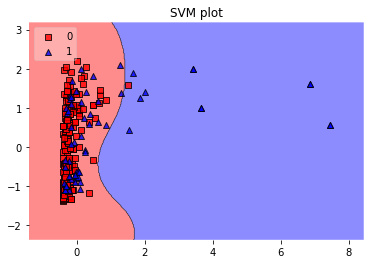

In [141]:
from mlxtend.plotting import plot_decision_regions
import matplotlib.pyplot as plt

fig = plot_decision_regions(X, y, clf = svc,  legend = 2, colors = 'red,blue')
plt.title('SVM plot')
plt.show()

# **Confusion Matrix**

A confusion matrix is a tabular summary of the number of correct and incorrect predictions made by a classifier. It can be used to evaluate the performance of a classification model through the calculation of performance metrics like accuracy, precision, recall, and F1-score.

              precision    recall  f1-score   support

           0       0.85      1.00      0.92        47
           1       1.00      0.38      0.56        13

    accuracy                           0.87        60
   macro avg       0.93      0.69      0.74        60
weighted avg       0.89      0.87      0.84        60



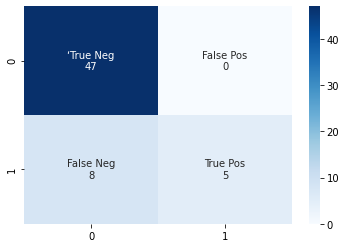

In [142]:
from sklearn import metrics
import seaborn as sns

group_names = ["‘True Neg","False Pos","False Neg","True Pos"]
cf_matrix = metrics.confusion_matrix(test_y, pr)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = "Blues")
print(metrics.classification_report(test_y, pr))

# **Naive Bayes**

In [143]:
df.head(10)

,Pd,Tauc,clf
238,0.203630,8.762039,0
138,0.002288,5.126570,0
99,0.095145,3.178585,0
16,0.009409,1.037975,0
284,0.024071,1.103470,0
8,0.024071,1.103470,0
206,0.003404,2.913939,0
283,0.014944,1.321682,0
231,0.012136,7.863555,0
245,0.024087,6.770648,0


In [144]:
from sklearn.preprocessing import LabelEncoder

df["Pd"] = LabelEncoder().fit_transform(df["Pd"])
df["Tauc"] = LabelEncoder().fit_transform(df["Tauc"])

df.head(10)

,Pd,Tauc,clf
238,234,226,0
138,7,138,0
99,223,109,0
16,71,34,0
284,149,37,0
8,149,37,0
206,17,100,0
283,108,45,0
231,91,205,0
245,150,173,0


In [145]:
y1 = np.array(df["clf"].reset_index(drop = True))
X1 = np.array(stats.zscore(df.drop(["clf"], axis = 1)))

In [146]:
from sklearn.naive_bayes import GaussianNB

X_train, X_test, y_train, y_test = train_test_split(X1, y1, test_size = 0.2, random_state = 0)
clf = GaussianNB()
clf.fit(X_train, y_train)
pred = clf.predict(X_test)
accuracy_score(y_test, pred)

0.8

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


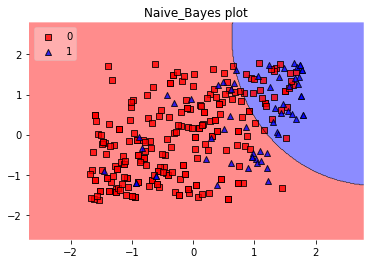

In [147]:
fig1 = plot_decision_regions(X1, y1, clf = clf,  legend = 2, colors = 'red,blue')
plt.title('Naive_Bayes plot')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        47
           1       0.55      0.46      0.50        13

    accuracy                           0.80        60
   macro avg       0.70      0.68      0.69        60
weighted avg       0.79      0.80      0.79        60



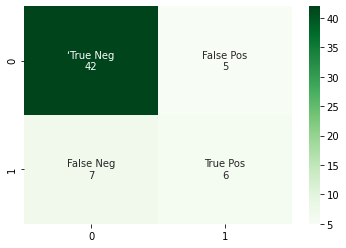

In [148]:
group_names = ["‘True Neg","False Pos","False Neg","True Pos"]
cf_matrix = metrics.confusion_matrix(y_test, pred)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = "Greens")
print(metrics.classification_report(y_test, pred))

# **K Nearest Neighbour**

In [149]:
df2.head(10)

,Pd,Tauc,clf
238,1.517245,1.583139,0
138,-0.393712,0.332969,0
99,0.487602,-0.336906,0
16,-0.326117,-1.073022,0
284,-0.186965,-1.050499,0
8,-0.186965,-1.050499,0
206,-0.383118,-0.427913,0
283,-0.273588,-0.975460,0
231,-0.300242,1.274167,0
245,-0.186814,0.898337,0


In [150]:
y2 = np.array(df2["clf"].reset_index(drop = True))
X2 = np.array(stats.zscore(df2.drop(["clf"], axis = 1)))

In [151]:
from sklearn.neighbors import KNeighborsClassifier

X_train, X_test, y_train, y_test = train_test_split(X2, y2, test_size = 0.2, random_state = 0)
knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)
prediction = knn.predict(X_test)
accuracy_score(y_test, prediction)

0.85

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


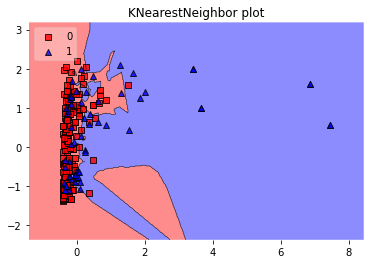

In [152]:
fig2 = plot_decision_regions(X2, y2, clf = knn,  legend = 2, colors = 'red,blue')
plt.title('KNearestNeighbor plot')
plt.show()

              precision    recall  f1-score   support

           0       0.86      0.89      0.88        47
           1       0.55      0.46      0.50        13

    accuracy                           0.80        60
   macro avg       0.70      0.68      0.69        60
weighted avg       0.79      0.80      0.79        60



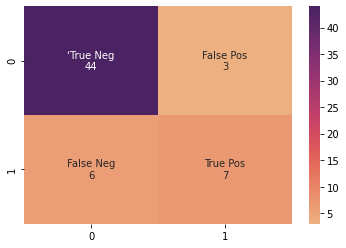

In [153]:
group_names = ["‘True Neg","False Pos","False Neg","True Pos"]
cf_matrix = metrics.confusion_matrix(y_test, prediction)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = "flare")
print(metrics.classification_report(y_test, pred))

# **Logistic Regression**

In [154]:
df3.head(10)

,Pd,Tauc,clf
238,1.517245,1.583139,0
138,-0.393712,0.332969,0
99,0.487602,-0.336906,0
16,-0.326117,-1.073022,0
284,-0.186965,-1.050499,0
8,-0.186965,-1.050499,0
206,-0.383118,-0.427913,0
283,-0.273588,-0.975460,0
231,-0.300242,1.274167,0
245,-0.186814,0.898337,0


In [155]:
y3 = np.array(df3["clf"].reset_index(drop = True))
X3 = np.array(stats.zscore(df3.drop(["clf"], axis = 1)))

In [156]:
from sklearn.linear_model import LogisticRegression

X_train, X_test, y_train, y_test = train_test_split(X3, y3, test_size = 0.2, random_state = 0)
lr = LogisticRegression(random_state = 42)
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)
accuracy_score(y_test, lr_pred)

0.8666666666666667

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


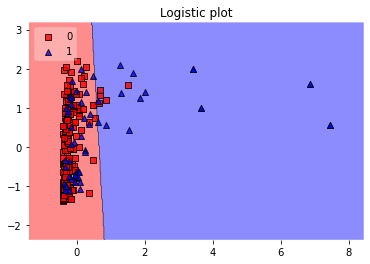

In [157]:
fig3 = plot_decision_regions(X3, y3, clf = lr,  legend = 2, colors = 'red,blue')
plt.title('Logistic plot')
plt.show()

              precision    recall  f1-score   support

           0       0.87      0.98      0.92        47
           1       0.86      0.46      0.60        13

    accuracy                           0.87        60
   macro avg       0.86      0.72      0.76        60
weighted avg       0.87      0.87      0.85        60



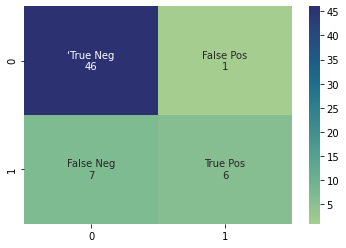

In [158]:
group_names = ["‘True Neg","False Pos","False Neg","True Pos"]
cf_matrix = metrics.confusion_matrix(y_test, lr_pred)
group_counts = ["{0:0.0f}".format(value) for value in cf_matrix.flatten()]
labels = [f"{v1}\n{v2}" for v1, v2 in zip(group_names,group_counts)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(cf_matrix, annot = labels, fmt = '', cmap = "crest")
print(metrics.classification_report(y_test, lr_pred))